## Assignment 10 Giulia Sora

Importing modules and libraries we need

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 

Importing the external files

In [4]:
ExternalFilesFolder =  r"C:\Users\Giulia\Desktop\Gitex\Data-driven_Building_simulation_Polimi_EETBS\Data"
ConsumptionFileName= "consumption_5545.csv"
TemperatureFileName= "Austin_weather_2014.csv"
IrradianceFileName= "irradiance_2014_gen.csv"

path_consumptionFile = os.path.join(ExternalFilesFolder,ConsumptionFileName)
path_TemperatureFile = os.path.join(ExternalFilesFolder,TemperatureFileName)
path_IrradianceFile = os.path.join(ExternalFilesFolder,IrradianceFileName)


Opening the consumption file and giving it the name DF_Consumption

In [5]:
DF_consumption = pd.read_csv(path_consumptionFile,sep=",", index_col=0)

Making python reading the index of the excel file in a date time format

In [6]:
PreviousIndex = DF_consumption.index
NewParsedIndex= pd.to_datetime(PreviousIndex)
DF_consumption.index =NewParsedIndex 

These are useful ways to see which the first lines of the excel file, the index of hour, month and day of the week are

In [7]:
DF_consumption.head()
DF_consumption.index.hour
DF_consumption.index.month
DF_consumption.index.dayofweek

Int64Index([2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
            ...
            1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
           dtype='int64', length=8736)

mi sa che non funziona l index per hour

Extracting from the DF_consumption the data of a specific period of time

In [8]:
DF_consumption_someDaysInJuly=DF_consumption["2014-07-01 00:00:00":"2014-07-03 23:00:00"]

Plotting these data on a graph which it has the date on the x-axis and the value of consumption of every hour on the y-axis

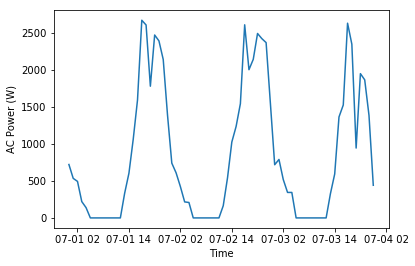

In [9]:
plt.figure()
plt.plot(DF_consumption_someDaysInJuly)
plt.xlabel("Time")
plt.ylabel("AC Power (W)")
plt.show()

Other way of plotting them

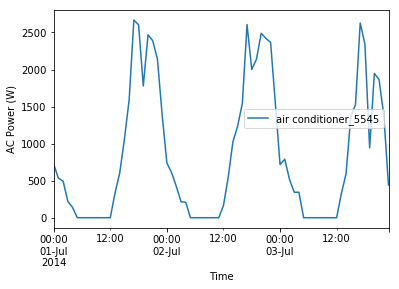

In [10]:
plt.figure()
DF_consumption_someDaysInJuly.plot()
plt.xlabel("Time")
plt.ylabel("AC Power (W)")
plt.show()

Opening the weather file and extracting the temperature column

In [11]:
DF_weather = pd.read_csv(path_TemperatureFile,sep=";",index_col=0)
DF_weather.head(24)
previousIndex_weather=DF_weather.index
newIndex_weather=pd.to_datetime(previousIndex_weather)
DF_weather.index = newIndex_weather
DF_weather.columns
Series_Temperature = DF_weather["temperature"]           
Series_Temperature.head(4)
DF_Temperature= DF_weather[["temperature"]]
DF_Temperature.head()

,temperature
localhour,
2014-01-01 06:00:00,40.36
2014-01-01 07:00:00,38.11
2014-01-01 08:00:00,38.65
2014-01-01 09:00:00,38.47
2014-01-01 10:00:00,38.00


Opening the irradiance source file and seeing the first five lines

In [12]:
DF_irradianceSource = pd.read_csv(path_IrradianceFile,sep=";",index_col=1)
DF_irradianceSource.head(5)

,dataid,use,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,refrigerator1,refrigerator2,security1,shed1,sprinkler1,utilityroom1,venthood1,waterheater1,waterheater2,winecooler1
localhour,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,8236,0.303150,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0051,...,0.051567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 01:00:00,8236,0.358567,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,...,0.013417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 02:00:00,8236,0.367283,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,...,0.016283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 03:00:00,8236,0.350333,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,...,0.025300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 04:00:00,8236,0.562517,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,...,0.029950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We want to take from it just a column, the generation one because that's how we can have information about the irradiance. Infact there is direct relation between the irradiance and the generation of power of a solar pannel.

In [13]:
DF_irradiance=DF_irradianceSource[["gen"]]
DF_irradiance.head(5)

,gen
localhour,
2014-01-01 00:00:00,-0.005967
2014-01-01 01:00:00,-0.006317
2014-01-01 02:00:00,-0.006350
2014-01-01 03:00:00,-0.006267
2014-01-01 04:00:00,-0.006767


Because of the approximation to zero in the days in which there is no production, some values are negative and close to zero. We want them to be zero so we select the one which are negative and substitute them with a zero

In [14]:
DF_irradiance["gen"]<0
DF_irradiance[DF_irradiance["gen"]<0] = 0
DF_irradiance.head(5)

C:\Users\Giulia\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Giulia\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\pandas\core\frame.py:2346: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer(indexer, value)
C:\Users\Giulia\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\pandas\core\frame.py:2326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

,gen
localhour,
2014-01-01 00:00:00,0.0
2014-01-01 01:00:00,0.0
2014-01-01 02:00:00,0.0
2014-01-01 03:00:00,0.0
2014-01-01 04:00:00,0.0


Then we create a table with generation and temperature information

In [15]:
DF_joined = DF_consumption.join([DF_Temperature,DF_irradiance])
DF_joined.head(5)

,air conditioner_5545,temperature,gen
2014-01-01 00:00:00,NaN,NaN,0.0
2014-01-01 01:00:00,NaN,NaN,0.0
2014-01-01 02:00:00,NaN,NaN,0.0
2014-01-01 03:00:00,NaN,NaN,0.0
2014-01-01 04:00:00,NaN,NaN,0.0


We want to delete every Not A Number values and overwrite them with a zero

In [16]:
DF_joined_cleaned = DF_joined.dropna()
DF_joined_cleaned.head(5)

,air conditioner_5545,temperature,gen
2014-01-01 06:00:00,0.0,40.36,0.000000
2014-01-01 07:00:00,0.0,38.11,0.052800
2014-01-01 08:00:00,0.0,38.65,0.773583
2014-01-01 09:00:00,0.0,38.47,2.097700
2014-01-01 10:00:00,0.0,38.00,3.036750


In [17]:
DF_joined_cleaned_copy = DF_joined.dropna().copy()

Taking other data in a specific period

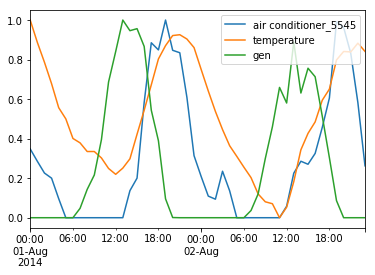

In [18]:
DF_joined_cleanedchosenDates=DF_joined_cleaned_copy["2014-08-01":"2014-08-02"]
DF_joined_cleanedchosenDates.head()
DF_joined_cleanedchosenDates.describe()                                    #just for one day
DF_joined_cleanedchosenDates.min()
DF_joined_cleanedchosenDates.max()
DF_joined_cleanedchosenDates_normalized=(DF_joined_cleanedchosenDates-DF_joined_cleanedchosenDates.min())/(DF_joined_cleanedchosenDates.max()-DF_joined_cleanedchosenDates.min())
DF_joined_cleanedchosenDates.dropna()
plt.figure()
DF_joined_cleanedchosenDates_normalized.plot()
plt.show()                             

From this graph we can see that the temperature pick is between the 18:00 and th 00:00.it's like that because we took the temperature data form a weather station whose clock is sincronized with the Greenwich time. We need to fix it. We have to shift the temperature because of the timezone

In [19]:
DF_joined=DF_consumption.join([DF_Temperature,DF_irradiance])
DF_mod=DF_joined.copy()                                            
DF_mod["temperature"]=DF_mod["temperature"].shift(-5)           
DF_mod.dropna()
DF_mod.dropna(inplace=True) 
DF_mod=DF_mod.dropna()
DF_mod.describe()

,air conditioner_5545,temperature,gen
count,8670.000000,8670.000000,8670.000000
mean,345.707233,67.717625,0.975530
std,655.969001,16.256376,1.421250
min,0.000000,20.730000,0.000000
25%,0.000000,56.630000,0.000000
50%,0.000000,70.250000,0.012317
75%,411.575000,79.480000,1.669108
max,2841.000000,101.050000,5.099667


We need to create other columns with shifted data

In [20]:
DF_mod["temperature -1h"]=DF_mod["temperature"].shift(1)
DF_mod["temperature -2h"]=DF_mod["temperature"].shift(2)
DF_mod["temperature -3h"]=DF_mod["temperature"].shift(3)
DF_mod["temperature -4h"]=DF_mod["temperature"].shift(4)
DF_mod["temperature -5h"]=DF_mod["temperature"].shift(5)
DF_mod["temperature -6h"]=DF_mod["temperature"].shift(6)
DF_mod.head(6) 

,air conditioner_5545,temperature,gen,temperature -1h,temperature -2h,temperature -3h,temperature -4h,temperature -5h,temperature -6h
2014-01-01 06:00:00,0.0,38.85,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 07:00:00,0.0,39.36,0.052800,38.85,NaN,NaN,NaN,NaN,NaN
2014-01-01 08:00:00,0.0,37.86,0.773583,39.36,38.85,NaN,NaN,NaN,NaN
2014-01-01 09:00:00,0.0,38.97,2.097700,37.86,39.36,38.85,NaN,NaN,NaN
2014-01-01 10:00:00,0.0,45.85,3.036750,38.97,37.86,39.36,38.85,NaN,NaN
2014-01-01 11:00:00,0.0,51.42,2.384400,45.85,38.97,37.86,39.36,38.85,NaN


With this table we can see the behavior of the temperature in the previous hours. We can do apply this iterative way or create a function.

In [21]:
DF_mod=DF_mod.rename(columns={"air conditioner_5545":"AC_Consumption","gen":"irradiance"})
DF_mod.columns

def lag_feature(df,columns_name,lag_start,lag_end,lag_interval):
    for i in range(lag_start,lag_end+1,lag_interval): #creating a range vector for the time interval in which i want to start
        new_columns_name=columns_name+" -"+str(i)+"hr"
        print new_columns_name
        df[new_columns_name]=df[columns_name].shift(i)
        df.dropna(inplace=True)
    return df

DF_mod=lag_feature(DF_mod,"temperature",1,6,1)
DF_mod.columns 
DF_mod=lag_feature(DF_mod,"irradiance",3,6,1)

temperature -1hr
temperature -2hr
temperature -3hr
temperature -4hr
temperature -5hr
temperature -6hr
irradiance -3hr
irradiance -4hr
irradiance -5hr
irradiance -6hr


Now we add the consumption of the previous 24h to have a better idea of what the next consumption will be like

In [22]:
DF_mod=lag_feature(DF_mod,"AC_Consumption",1,24,1)
DF_mod.describe()

DF_mod.head()

AC_Consumption -1hr
AC_Consumption -2hr
AC_Consumption -3hr
AC_Consumption -4hr
AC_Consumption -5hr
AC_Consumption -6hr
AC_Consumption -7hr
AC_Consumption -8hr
AC_Consumption -9hr
AC_Consumption -10hr
AC_Consumption -11hr
AC_Consumption -12hr
AC_Consumption -13hr
AC_Consumption -14hr
AC_Consumption -15hr
AC_Consumption -16hr
AC_Consumption -17hr
AC_Consumption -18hr
AC_Consumption -19hr
AC_Consumption -20hr
AC_Consumption -21hr
AC_Consumption -22hr
AC_Consumption -23hr
AC_Consumption -24hr


,AC_Consumption,temperature,irradiance,temperature -1h,temperature -2h,temperature -3h,temperature -4h,temperature -5h,temperature -6h,temperature -1hr,...,AC_Consumption -15hr,AC_Consumption -16hr,AC_Consumption -17hr,AC_Consumption -18hr,AC_Consumption -19hr,AC_Consumption -20hr,AC_Consumption -21hr,AC_Consumption -22hr,AC_Consumption -23hr,AC_Consumption -24hr
2014-01-15 14:00:00,0.0,58.34,3.985133,57.37,53.34,49.51,43.73,39.31,39.24,57.37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-15 15:00:00,0.0,60.00,3.329083,58.34,57.37,53.34,49.51,43.73,39.31,58.34,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-15 16:00:00,0.0,62.22,2.062200,60.00,58.34,57.37,53.34,49.51,43.73,60.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-15 17:00:00,0.0,62.35,0.457383,62.22,60.00,58.34,57.37,53.34,49.51,62.22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-15 18:00:00,0.0,61.17,0.000000,62.35,62.22,60.00,58.34,57.37,53.34,62.35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now we can consider the seasonality

In [23]:
DF_mod["hour"]=DF_mod.index.hour
DF_mod["hour"].head()
DF_mod["sin_hour"]=np.sin(DF_mod.index.hour*2*np.pi/24) 
DF_mod[["sin_hour"]].head()
DF_mod["cos_hour"]=np.cos(DF_mod.index.hour*2*np.pi/24)
DF_mod[["cos_hour"]].head()

DF_mod["day_of_week"]=DF_mod.index.dayofweek   
DF_mod["month"]=DF_mod.index.month
DF_mod["week of year"]=DF_mod.index.week

In this way first we treat time like a continuous function using the sin an cosine. Then we create columns with the corresponding number of the day of the week, of the month and the number of the week in the year.

In [24]:
def weekendDetector(day):
        if (day==5 or day== 6):
            weekendlabel=1
        else:
            weekendlabel=0
        return weekendlabel
DF_mod["Weekend"]=DF_mod["day_of_week"].apply(weekendDetector)

def dayDetector(hour):
        if (hour< 19 and hour>9):
            Daylabel=1                #+1 completely proportionale, direct correletion,-1 no proporzional correlation
        else:
            Daylabel=0
        return Daylabel
DF_mod["WorkingTime"]=DF_mod["hour"].apply(weekendDetector)

DF_mod[["WorkingTime","Weekend"]].head(5)

,WorkingTime,Weekend
2014-01-15 14:00:00,0,0
2014-01-15 15:00:00,0,0
2014-01-15 16:00:00,0,0
2014-01-15 17:00:00,0,0
2014-01-15 18:00:00,0,0


These are functions with which calculate if a day is a weekend day or work day and if it is time for work or time for rest

## Assignment 10: beginning

In [26]:
  #That's the part in which we have the table with the probably relation between values
DF_mod.describe()


,AC_Consumption,temperature,irradiance,temperature -1h,temperature -2h,temperature -3h,temperature -4h,temperature -5h,temperature -6h,temperature -1hr,...,AC_Consumption -23hr,AC_Consumption -24hr,hour,sin_hour,cos_hour,day_of_week,month,week of year,Weekend,WorkingTime
count,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000,...,8326.000000,8326.000000,8326.000000,8.326000e+03,8.326000e+03,8326.000000,8326.000000,8326.000000,8326.000000,8326.000000
mean,359.990597,68.457589,0.979776,68.459676,68.461260,68.462358,68.462623,68.462314,68.461859,68.459676,...,359.990597,359.990597,11.500601,2.078220e-05,-1.190255e-03,2.996757,6.710425,27.388302,0.285251,0.083473
std,665.532274,15.953537,1.421979,15.950950,15.948793,15.947174,15.946744,15.947283,15.948063,15.950950,...,665.532274,665.532274,6.916607,7.074817e-01,7.068157e-01,2.000508,3.302976,14.357050,0.451561,0.276613
min,0.000000,22.920000,0.000000,22.920000,22.920000,22.920000,22.920000,22.920000,22.920000,22.920000,...,0.000000,0.000000,0.000000,-1.000000e+00,-1.000000e+00,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,57.742500,0.000000,57.742500,57.742500,57.742500,57.742500,57.742500,57.742500,57.742500,...,0.000000,0.000000,6.000000,-7.071068e-01,-7.071068e-01,1.000000,4.000000,15.000000,0.000000,0.000000
50%,0.000000,71.365000,0.014083,71.365000,71.365000,71.365000,71.365000,71.365000,71.365000,71.365000,...,0.000000,0.000000,12.000000,1.224647e-16,-1.836970e-16,3.000000,7.000000,27.000000,0.000000,0.000000
75%,460.041667,79.950000,1.673250,79.950000,79.950000,79.950000,79.950000,79.950000,79.950000,79.950000,...,460.041667,460.041667,17.000000,7.071068e-01,7.071068e-01,5.000000,10.000000,40.000000,1.000000,0.000000
max,2841.000000,101.050000,5.099667,101.050000,101.050000,101.050000,101.050000,101.050000,101.050000,101.050000,...,2841.000000,2841.000000,23.000000,1.000000e+00,1.000000e+00,6.000000,12.000000,52.000000,1.000000,1.000000
